### Part 1 using Pima Indian Diabetes Dataset

In [270]:
#part 1 assignment 3
# dataset can be found below, additionally diabetes.csv is attached in the submission
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

import numpy as np
import pandas as pd


df = pd.read_csv("diabetes.csv")
# replace 0 insulin with median
df['Insulin'].replace(to_replace=0, value = df['Insulin'].median(), inplace = True)
# clean data, drop bp,bmi,gluc = zero 
data= df[(df.Glucose != 0) & (df.BloodPressure != 0) & (df.SkinThickness != 0)]

data['Outcome'].replace(0, 'not diabetic', inplace=True)
data['Outcome'].replace(1, 'diabetic', inplace=True)

data.shape # (534,9)
data.head()

C:\Users\tip-t\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,diabetic
1,1,85,66,29,30.5,26.6,0.351,31,not diabetic
3,1,89,66,23,94.0,28.1,0.167,21,not diabetic
4,0,137,40,35,168.0,43.1,2.288,33,diabetic
6,3,78,50,32,88.0,31.0,0.248,26,diabetic


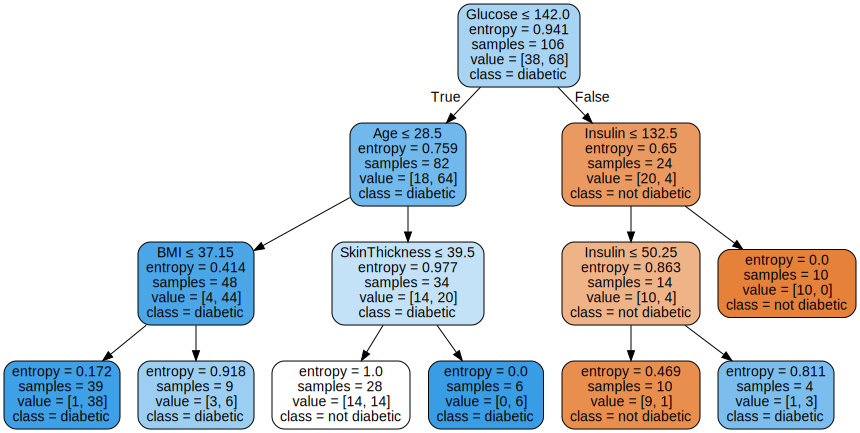

In [273]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

y = pd.DataFrame(data, columns=['Outcome']) #target
X = data.drop(['Outcome'],axis=1)  #predictors

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1) # 80% training and 20% test

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['not diabetic','diabetic'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [274]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, y_pred)))


Accuracy on test data is 0.68


### LogisticRegression

['diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabet

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\linear_

Text(0, 0.5, 'Accuracy')

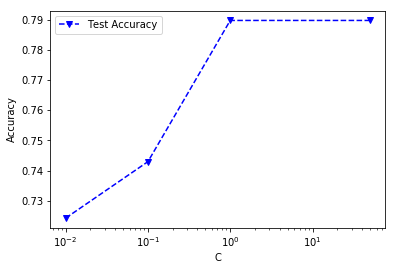

In [275]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

C = [0.01,0.1,1,50]
# target ***
y = pd.DataFrame(data, columns=['Outcome'])
# predictor ***
X = data.drop(['Outcome'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, y)

LRtestAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X,y)
    log_reg_pred = clf.predict(X_test)
    print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))

plt.plot(C, LRtestAcc,'bv--')
plt.legend(['Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  


In [276]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, log_reg_pred)))

Accuracy on test data is 0.79


###  Naive Bayes Classifier

In [277]:
from sklearn.naive_bayes import GaussianNB

clf_NB = GaussianNB()
clf_NB.fit(X,y)
NB_pred = clf_NB.predict(X_test)
print(NB_pred)



['diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabe

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [278]:
from sklearn.metrics import accuracy_score

print('Accuracy on test data is %.2f' % (accuracy_score(y_test, NB_pred)))

Accuracy on test data is 0.77


### Support Vector Machine (SVM) Classifier
### Linear Decision Boundary

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not dia

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not 

Text(0, 0.5, 'Accuracy')

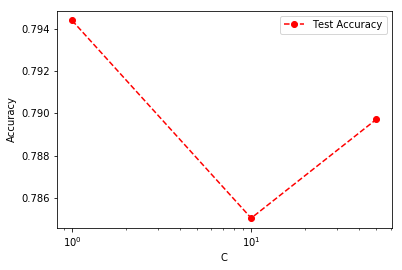

In [279]:
from sklearn.svm import SVC

C = [1.0, 10.0, 50.0]

SVMLtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='linear')
    clf.fit(X,y)
    svml_pred = clf.predict(X_test)
    print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))
    print('Accuracy on test data is %.2f' % (accuracy_score(y_test, svml_pred)))

plt.plot(C, SVMLtestAcc,'ro--')
plt.legend(['Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy') 


### non linear

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not dia

C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tip-t\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not dia

Accuracy on test data is 1.00


Text(0, 0.5, 'Accuracy')

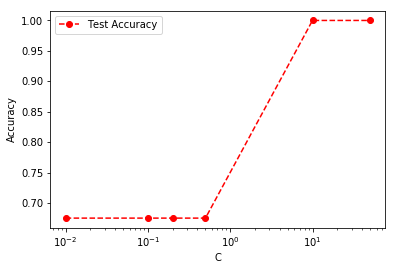

In [280]:
C = [0.01, 0.1, 0.2, 0.5,10,50]

SVMLtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X,y)
    svmnl_pred = clf.predict(X_test)
    print(svmnl_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svmnl_pred))
    print('Accuracy on test data is %.2f' % (accuracy_score(y_test, svmnl_pred)))

plt.plot(C, SVMLtestAcc,'ro--')
plt.legend(['Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

### K Nearest Neighbor (KNN) Classifier

['diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'diabetic' 'diabetic' 'diabetic' 'diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic'
 'diabetic' 'not diabetic' 'diabetic' 'not diabetic' 'not diabetic'
 'not diabetic' 'not diabetic' 'not diabetic' 'not diabetic' 'diabetic'
 'not diabetic' 'diab

C:\Users\tip-t\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\tip-t\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\tip-t\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0, 0.5, 'Accuracy')

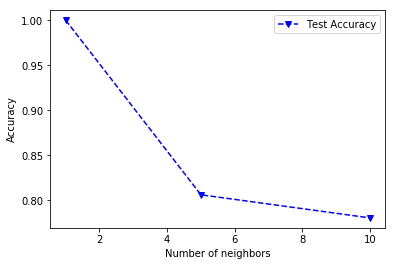

In [283]:
from sklearn.neighbors import KNeighborsClassifier

numNeighbors = [1, 5, 10]
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X, y)
    knn_pred = clf.predict(X_test)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))
plt.plot(numNeighbors, testAcc,'bv--')
plt.legend(['Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [285]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, knn_pred)))


Accuracy on test data is 0.78


### Artificial Neural Network

In [287]:
from keras import Sequential
from keras.layers import Dense
import numpy as np
from sklearn import preprocessing

In [288]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode text values to indexes(i.e. [1],[2],[3] for red,green,blue).
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [292]:
df = pd.read_csv("diabetes.csv")
# replace 0 insulin with median
df['Insulin'].replace(to_replace=0, value = df['Insulin'].median(), inplace = True)
# clean data, drop bp,bmi,gluc = zero 
data= df[(df.Glucose != 0) & (df.BloodPressure != 0) & (df.SkinThickness != 0)]

data['Outcome'].replace(0, 'not diabetic', inplace=True)
data['Outcome'].replace(1, 'diabetic', inplace=True)
Outcomes = encode_text_index(data,'Outcome')
Outcomes


C:\Users\tip-t\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\tip-t\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


array(['diabetic', 'not diabetic'], dtype=object)

In [293]:
X,y = to_xy(data,'Outcome')

print(X.shape)
print(y.shape)

(534, 8)
(534, 2)


In [294]:
model = Sequential()
model.add(Dense(10, input_dim = X.shape[1], activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,y,verbose=2, epochs=150)

Epoch 1/150
 - 3s - loss: 8.9398
Epoch 2/150
 - 0s - loss: 2.0575
Epoch 3/150
 - 0s - loss: 1.2046
Epoch 4/150
 - 0s - loss: 0.9911
Epoch 5/150
 - 0s - loss: 0.8843
Epoch 6/150
 - 0s - loss: 0.8354
Epoch 7/150
 - 0s - loss: 0.7854
Epoch 8/150
 - 0s - loss: 0.7572
Epoch 9/150
 - 0s - loss: 0.7374
Epoch 10/150
 - 0s - loss: 0.7010
Epoch 11/150
 - 0s - loss: 0.6950
Epoch 12/150
 - 0s - loss: 0.6926
Epoch 13/150
 - 0s - loss: 0.6733
Epoch 14/150
 - 0s - loss: 0.6703
Epoch 15/150
 - 0s - loss: 0.6627
Epoch 16/150
 - 0s - loss: 0.6519
Epoch 17/150
 - 0s - loss: 0.6473
Epoch 18/150
 - 0s - loss: 0.6422
Epoch 19/150
 - 0s - loss: 0.6283
Epoch 20/150
 - 0s - loss: 0.6273
Epoch 21/150
 - 0s - loss: 0.6649
Epoch 22/150
 - 0s - loss: 0.6534
Epoch 23/150
 - 0s - loss: 0.6300
Epoch 24/150
 - 0s - loss: 0.6206
Epoch 25/150
 - 0s - loss: 0.6031
Epoch 26/150
 - 0s - loss: 0.6256
Epoch 27/150
 - 0s - loss: 0.6204
Epoch 28/150
 - 0s - loss: 0.6108
Epoch 29/150
 - 0s - loss: 0.6029
Epoch 30/150
 - 0s - lo

In [295]:
pred = model.predict(X_test)

In [296]:
pred = np.argmax(pred, axis=1)

In [297]:
true = np.argmax(y_test, axis=1)

In [298]:
Outcomes[pred]

array(['diabetic', 'diabetic', 'diabetic', 'diabetic', 'diabetic',
       'diabetic', 'not diabetic', 'not diabetic', 'not diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'diabetic', 'diabetic',
       'not diabetic', 'diabetic', 'diabetic', 'not diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'diabetic',
       'not diabetic', 'not diabetic', 'not diabetic', 'diabetic',
       'not diabetic', 'diabetic', 'not diabetic', 'not diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'not diabetic',
       'diabetic', 'not diabetic', 'not diabetic', 'not diabetic',
       'diabetic', 'diabetic', 'diabetic', 'not diabetic', 'not diabetic',
       'diabetic', 'diabetic', 'not diabetic', 'diabetic', 'not diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'not diabetic',
       'not diabetic', 'not diabetic', 'diabetic', 'diabetic', 'diabetic',
       'not diabetic', 'not diabetic', 'di

In [299]:
Outcomes[true]

array([['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diabetic'],
       ['diab

In [300]:
from sklearn.metrics import accuracy_score
print('Accuracy on test data is %.2f' % (accuracy_score(true, pred)))

Accuracy on test data is 0.41
